/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29712/3855302544.py:58: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO})

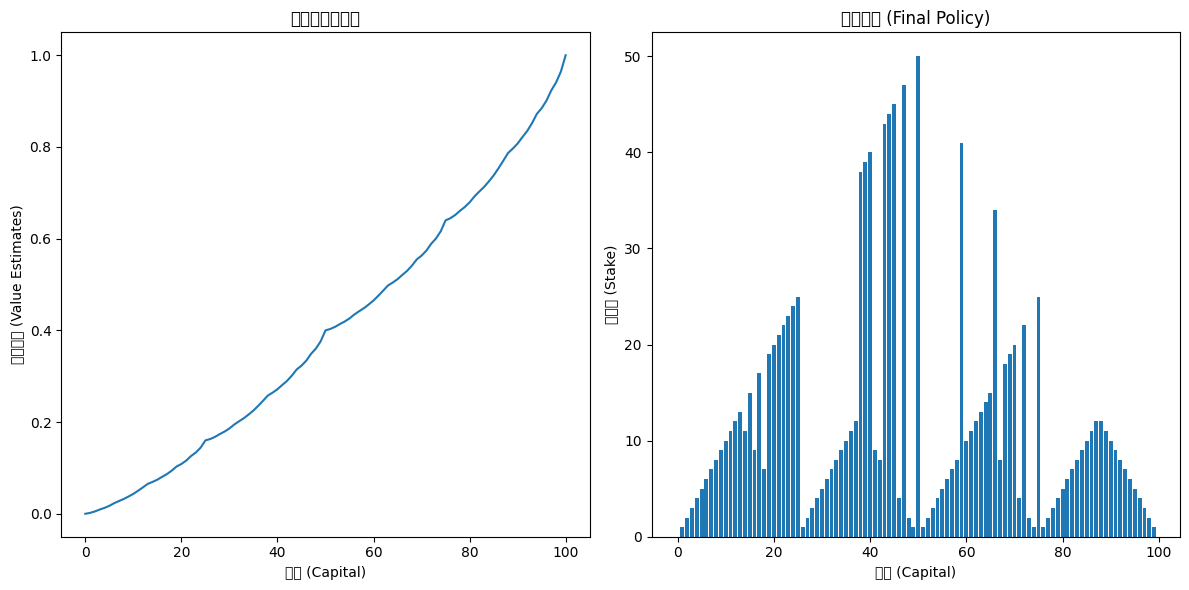

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
GOAL = 100
PH = 0.4  # コインの表が出る確率
THETA = 1e-4  # 収束条件

def gambler_value_iteration():
    # 初期化
    value = np.zeros(GOAL + 1)  # 状態価値関数
    value[GOAL] = 1  # ゴール状態の価値は1
    policy = np.zeros(GOAL, dtype=int)  # 最適方策

    while True:
        delta = 0
        for s in range(1, GOAL):
            old_value = value[s]
            actions = range(1, min(s, GOAL - s) + 1)
            action_values = [
                PH * value[s + a] + (1 - PH) * value[s - a] for a in actions
            ]
            value[s] = max(action_values)
            delta = max(delta, abs(old_value - value[s]))
        if delta < THETA:
            break

    # 方策改善
    for s in range(1, GOAL):
        actions = range(1, min(s, GOAL - s) + 1)
        action_values = [
            PH * value[s + a] + (1 - PH) * value[s - a] for a in actions
        ]
        policy[s] = actions[np.argmax(action_values)]
    
    return value, policy

# 実行
value, policy = gambler_value_iteration()

# 結果をプロット
plt.figure(figsize=(12, 6))

# 価値関数のプロット
plt.subplot(1, 2, 1)
plt.plot(range(GOAL + 1), value)
plt.xlabel('資本 (Capital)')
plt.ylabel('価値関数 (Value Estimates)')
plt.title('価値関数の収束')

# 方策のプロット
plt.subplot(1, 2, 2)
plt.bar(range(GOAL), policy)
plt.xlabel('資本 (Capital)')
plt.ylabel('賭け金 (Stake)')
plt.title('最適方策 (Final Policy)')

plt.tight_layout()
plt.show()


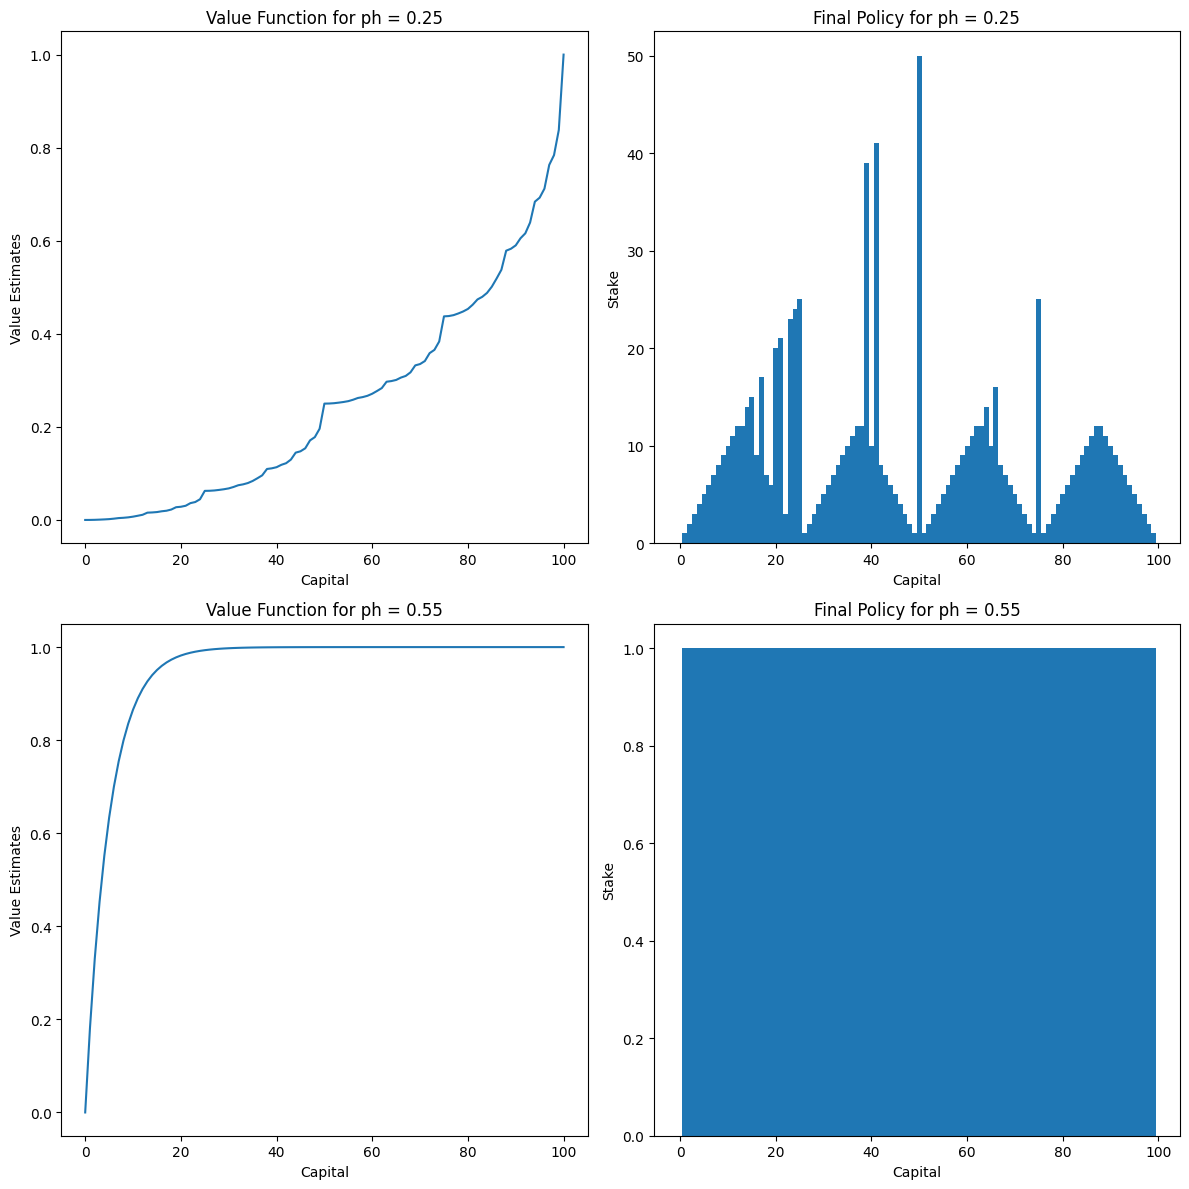

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
GOAL = 100  # ゴール（資本100ドル）
PH_VALUES = [0.25, 0.55]  # コインの表が出る確率
THETA = 1e-9  # 収束条件の閾値

def gambler_value_iteration(ph):
    """
    ギャンブラーの問題を値反復で解く関数
    """
    value = np.zeros(GOAL + 1)  # 状態価値関数
    value[GOAL] = 1  # ゴール状態の価値は1
    policy = np.zeros(GOAL + 1, dtype=int)  # 最適方策

    while True:
        delta = 0
        for s in range(1, GOAL):  # 状態0と100は固定
            old_value = value[s]
            actions = range(1, min(s, GOAL - s) + 1)  # 賭け金の範囲
            action_values = [
                ph * value[s + a] + (1 - ph) * value[s - a] for a in actions
            ]
            value[s] = max(action_values)
            delta = max(delta, abs(old_value - value[s]))
        if delta < THETA:
            break

    # 方策改善
    for s in range(1, GOAL):
        actions = range(1, min(s, GOAL - s) + 1)
        action_values = [
            ph * value[s + a] + (1 - ph) * value[s - a] for a in actions
        ]
        policy[s] = actions[np.argmax(action_values)]

    return value, policy

# 結果のプロット
fig, axes = plt.subplots(len(PH_VALUES), 2, figsize=(12, 6 * len(PH_VALUES)))

for i, ph in enumerate(PH_VALUES):
    value, policy = gambler_value_iteration(ph)

    # 価値関数のプロット
    axes[i, 0].plot(range(GOAL + 1), value)
    axes[i, 0].set_title(f"Value Function for ph = {ph}")
    axes[i, 0].set_xlabel("Capital")
    axes[i, 0].set_ylabel("Value Estimates")

    # 方策のプロット
    axes[i, 1].bar(range(GOAL), policy[:-1], width=1.0, align='center')
    axes[i, 1].set_title(f"Final Policy for ph = {ph}")
    axes[i, 1].set_xlabel("Capital")
    axes[i, 1].set_ylabel("Stake")

plt.tight_layout()
plt.show()
